In [5]:
# for this notebook make the path in the same folder (currently is in the project folder)
import os
import sys
import importlib

# Add the path to the val03 folder to sys.path so modules in the same folder can be imported
sys.path.append(os.path.join('notebooks', '102 minima varianza'))

In [6]:
from scripts import style
importlib.reload(style)
style.set_style()

In [7]:
# usage_example.py
import importlib
import py102
importlib.reload(py102)

<module 'py102' from 'c:\\Users\\herie\\GitHub\\Proyectos\\En Pausa\\Estimacion de Tendencia\\notebooks\\102 minima varianza\\py102.py'>

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\102 minima varianza\py102.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== BTC-USD transform 'close' ===
Variance: 9.872524e+08
[train    ]  RMSE = 8778.879532   RMSE_w = 11520.018514
[val      ]  RMSE = 15292.230757   RMSE_w = 9818.247580
[test     ]  RMSE = 47519.829330   RMSE_w = 57029.889357
[train_val]  RMSE = 10782.037553   RMSE_w = 12974.929921

=== BTC-USD transform 'log_close' ===
Variance: 3.447285e+00
[train    ]  RMSE = 0.576866   RMSE_w = 0.568877
[val      ]  RMSE = 1.193175   RMSE_w = 1.430175
[test     ]  RMSE = 1.649772   RMSE_w = 1.712322
[train_val]  RMSE = 0.778082   RMSE_w = 0.918459

=== BTC-USD transform 'sqrt_close' ===
Variance: 8.912215e+03
[train    ]  RMSE = 27.417925   RMSE_w = 34.467857
[val      ]  RMSE = 44.881927   RMSE_w = 37.915910
[test     ]  RMSE = 58.470330   RMSE_w = 69.305713
[train_val]  RMSE = 32.669632   RMSE_w = 38.901901

=== BTC-USD transform 'diff_close' ===
Variance: 1.232584e+06
[train    ]  RMSE = 659.394298   RMSE_w = 878.347287
[val      ]  RMSE = 1100.606459   RMSE_w = 807.406253
[test     ]  RMSE = 1

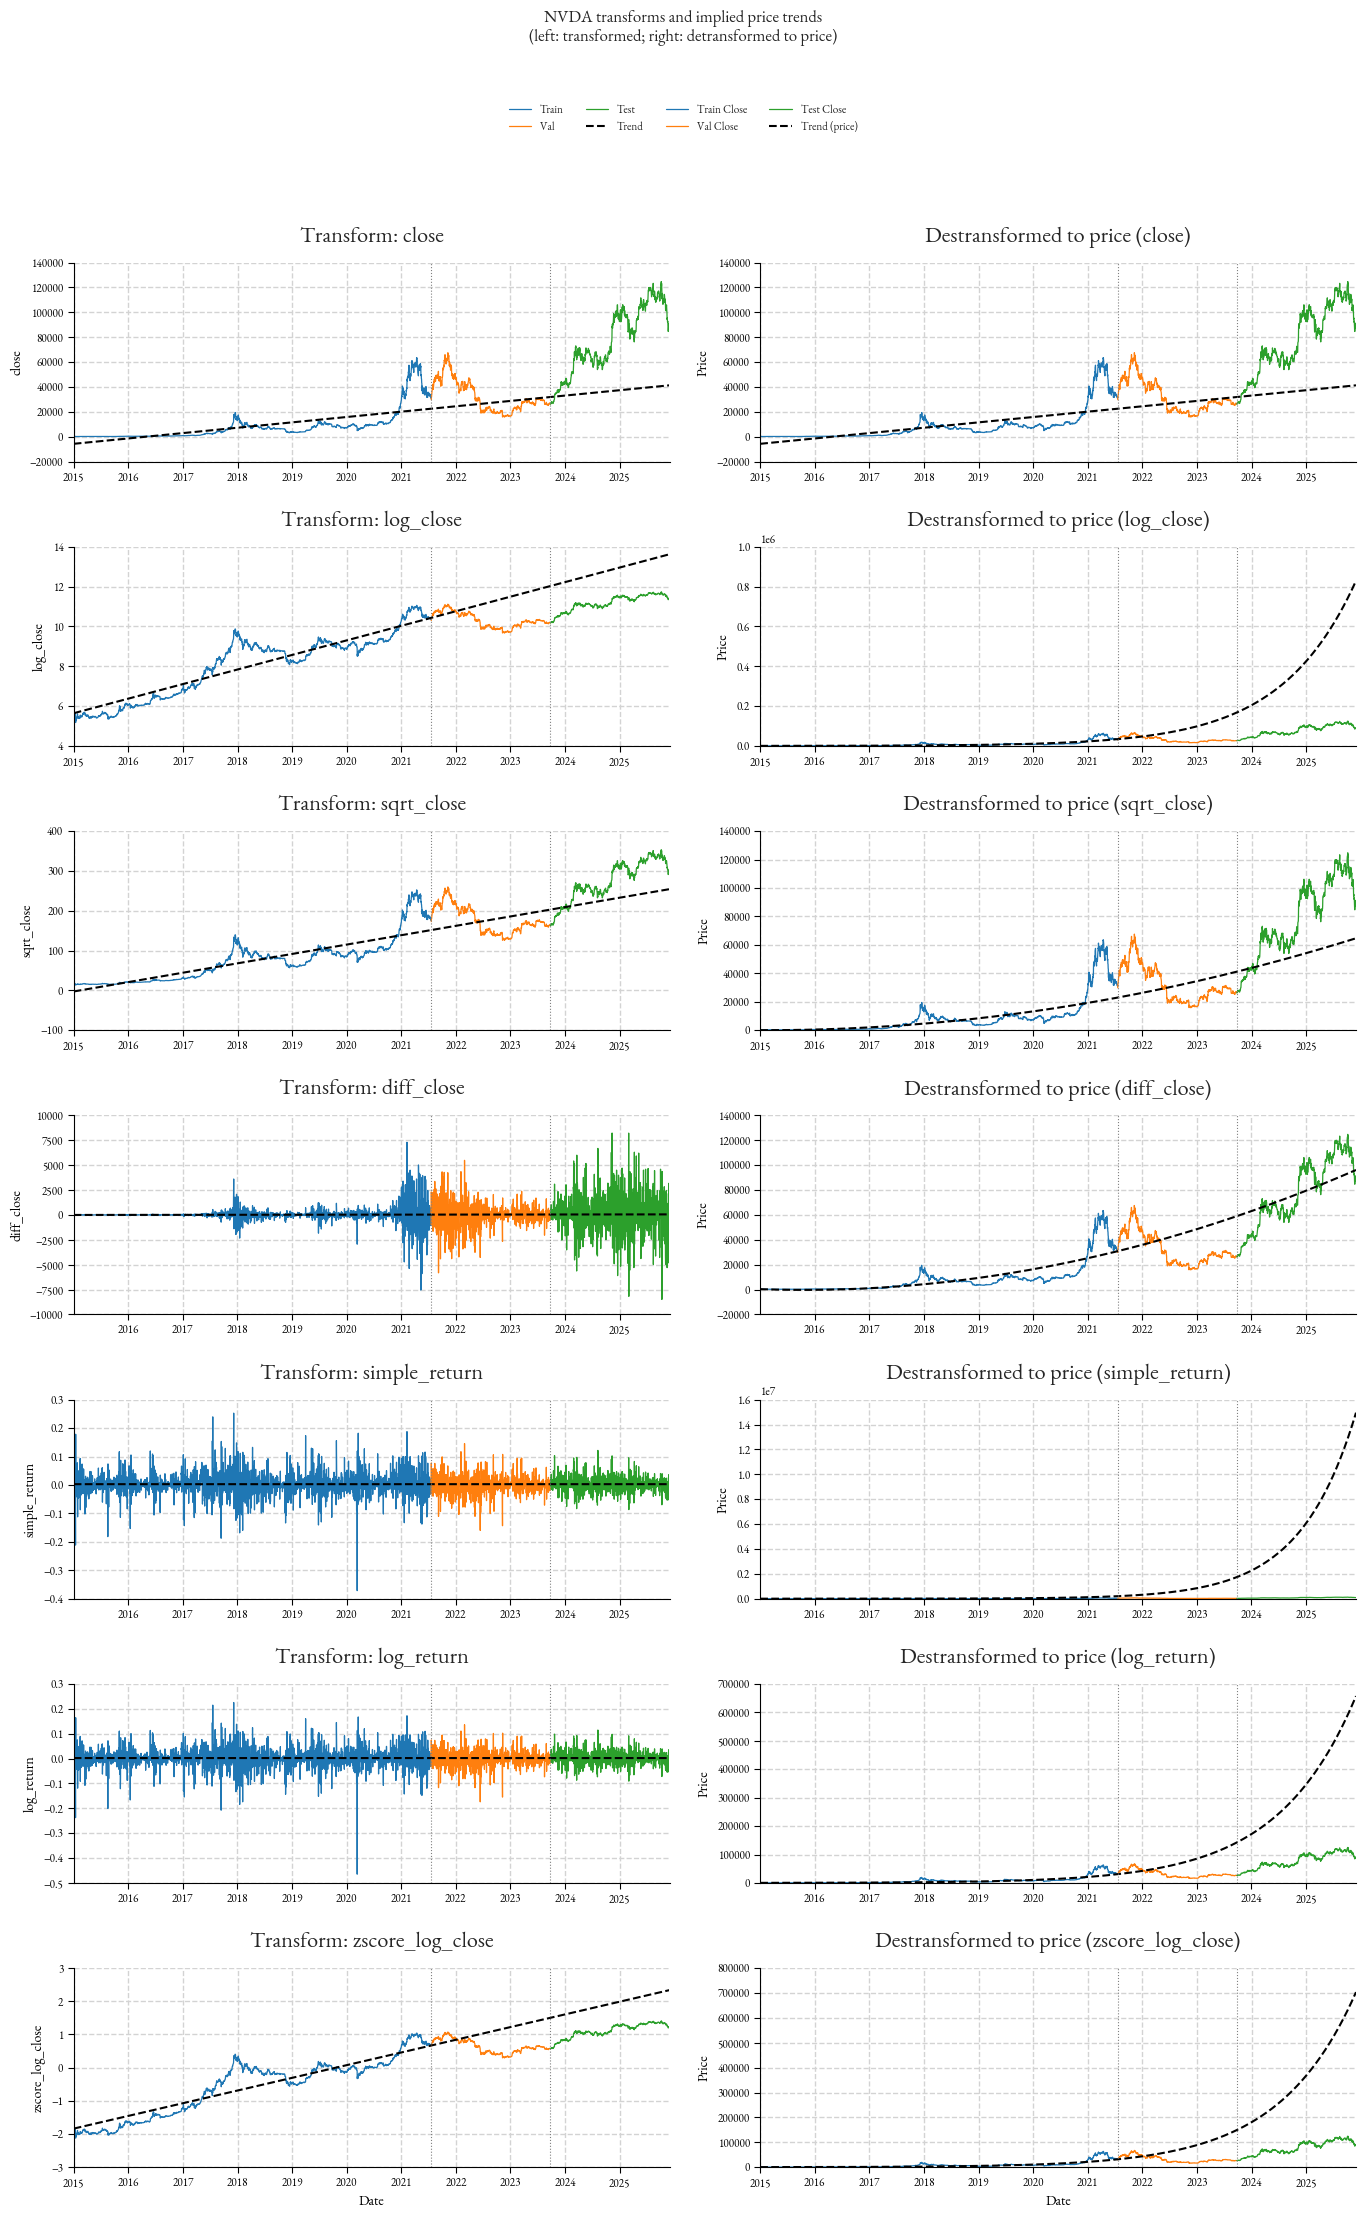

In [8]:
# usage_example.py

from py102 import (  # or nvda_trend_transforms
    run_all_transforms_experiment,
    subplot_all_transforms_and_destransforms,
)

# Run all transforms once
all_results, all_models, df_all = run_all_transforms_experiment(
    transform_names=None,  # None = all defined transforms
    ticker="BTC-USD",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
)

print("\n=== Summary over all transforms ===")
for name, res in all_results.items():
    var_ = res["variance"]
    rmse_train = res["metrics"]["train"]["rmse"]
    rmse_test = res["metrics"]["test"]["rmse"]
    print(
        f"{name:15s} | Var = {var_: .6e} | "
        f"RMSE_train = {rmse_train:.6f} | RMSE_test = {rmse_test:.6f}"
    )

# Single figure with subplots:
#   left column  = each transform (y_t) with trend
#   right column = original Close with "destransformed" trend
subplot_all_transforms_and_destransforms(
    df=df_all,
    models=all_models,
    transform_names=None,   # or a subset list, e.g. ['close','log_close','log_return']
    train_frac=0.6,
    val_frac=0.2,
)
